<a href="https://colab.research.google.com/github/MRX-25/Looker-Studio-Project/blob/main/Main_Code_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Earth Engine API
!pip install earthengine-api

# Import the Earth Engine library
import ee

# Authenticate the Earth Engine API
ee.Authenticate()

# Initialize the Earth Engine API with your project ID
ee.Initialize(project='ee-tanvir-ifz')  # Use your actual project ID here

# Define the bounding box for the Bay of Bengal
bbox = ee.Geometry.Rectangle(80.0, 5.0, 97.5, 22.5)  # lon_min, lat_min, lon_max, lat_max

# Load MODIS Aqua chlorophyll-a data
chlorophyll = ee.ImageCollection('NASA/OCEANDATA/MODIS-Aqua/L3SMI') \
               .filterBounds(bbox) \
               .filterDate('2022-01-01', '2022-12-31')  # Specify your date range

# Get the mean chlorophyll-a image for the specified date range
mean_chlorophyll = chlorophyll.mean()

# Define the export task
task = ee.batch.Export.image.toDrive(image=mean_chlorophyll,
                                     description='mean_chlorophyll_bay_of_bengal',
                                     scale=1000,
                                     region=bbox.getInfo()['coordinates'],
                                     fileFormat='GeoTIFF')

# Start the export task
task.start()
print("Exporting...")


Exporting...


**test**


In [ ]:
# Install Earth Engine API if not installed
# !pip install earthengine-api

# Import the Earth Engine library
import ee

# Authenticate the Earth Engine API (Uncomment if running for the first time)
# ee.Authenticate()

# Initialize the Earth Engine API
ee.Initialize()

# Define the bounding box for the Bay of Bengal
bbox = ee.Geometry.Rectangle(80.0, 5.0, 97.5, 22.5)  # lon_min, lat_min, lon_max, lat_max

# Load MODIS Aqua Sea Surface Temperature data
sst = ee.ImageCollection('NASA/OCEANDATA/MODIS-Aqua/L3SMI') \
          .filterBounds(bbox) \
          .filterDate('2022-01-01', '2022-12-31')  # Specify your date range

# Check if SST data is available
if sst.size().getInfo() == 0:
    print("No Sea Surface Temperature data available for the specified date range.")
else:
    # Get the mean Sea Surface Temperature image for the specified date range
    mean_sst = sst.mean()

    # Define the export task
    task = ee.batch.Export.image.toDrive(
        image=mean_sst,
        description='mean_sst_bay_of_bengal',
        scale=1000,  # Adjust scale as necessary
        region=bbox.getInfo()['coordinates'],
        fileFormat='GeoTIFF'
    )

    # Start the export task
    task.start()
    print("Exporting mean Sea Surface Temperature... Please check your Google Drive for the exported file.")


Exporting mean Sea Surface Temperature... Please check your Google Drive for the exported file.


In [ ]:
# Install Earth Engine API if not installed
# !pip install earthengine-api

# Import the Earth Engine library
import ee

# Authenticate the Earth Engine API (Uncomment if running for the first time)
# ee.Authenticate()

# Initialize the Earth Engine API
ee.Initialize()

# Define the bounding box for the Bay of Bengal
bbox = ee.Geometry.Rectangle(80.0, 5.0, 97.5, 22.5)  # lon_min, lat_min, lon_max, lat_max

# Load bathymetry data from ETOPO1
bathymetry = ee.Image('NOAA/NGDC/ETOPO1')

# Clip the bathymetry data to the bounding box
clipped_bathymetry = bathymetry.clip(bbox)

# Define the export task for bathymetry data
task_bathymetry = ee.batch.Export.image.toDrive(
    image=clipped_bathymetry,
    description='bathymetry_bay_of_bengal',
    scale=1000,  # Adjust scale as necessary
    region=bbox.getInfo()['coordinates'],
    fileFormat='GeoTIFF'
)

# Start the export task for bathymetry
task_bathymetry.start()
print("Exporting bathymetry data... Please check your Google Drive for the exported file.")


Exporting bathymetry data... Please check your Google Drive for the exported file.


In [ ]:
#ocean currents data
# Install Earth Engine API if not installed
# !pip install earthengine-api

# Import the Earth Engine library
import ee

# Authenticate the Earth Engine API (Uncomment if running for the first time)
# ee.Authenticate()

# Initialize the Earth Engine API
ee.Initialize()

# Define the bounding box for the Bay of Bengal (lon_min, lat_min, lon_max, lat_max)
bbox = ee.Geometry.Rectangle(80.0, 5.0, 97.5, 22.5)

# Load ocean currents data (GLOBE Ocean Currents)
ocean_currents = ee.ImageCollection('NASA/GLDAS/V021/NOAH/G025/T3H') \
                  .filterBounds(bbox) \
                  .filterDate('2022-01-01', '2022-12-31')

# Check if ocean currents data is available
if ocean_currents.size().getInfo() == 0:
    print("No ocean currents data available for the specified date range.")
else:
    # Get the mean ocean currents image for the specified date range
    mean_currents = ocean_currents.mean().clip(bbox)

    # Define the export task for ocean currents
    task_currents = ee.batch.Export.image.toDrive(
        image=mean_currents,
        description='mean_ocean_currents_bay_of_bengal',
        scale=1000,  # Adjust scale as necessary
        region=bbox.getInfo()['coordinates'],
        fileFormat='GeoTIFF'
    )

    # Start the export task for ocean currents
    task_currents.start()
    print("Exporting mean ocean currents... Please check your Google Drive for the exported file.")


Exporting mean ocean currents... Please check your Google Drive for the exported file.


In [ ]:
# wind data
# Install Earth Engine API if not installed
# !pip install earthengine-api

# Import the Earth Engine library
import ee

# Authenticate the Earth Engine API (Uncomment if running for the first time)
# ee.Authenticate()

# Initialize the Earth Engine API
ee.Initialize()

# Define the bounding box for the Bay of Bengal (lon_min, lat_min, lon_max, lat_max)
bbox = ee.Geometry.Rectangle(80.0, 5.0, 97.5, 22.5)

# Load wind data from NOAA CFSV2
wind_data = ee.ImageCollection('NOAA/CFSV2/FOR6H') \
                .filterBounds(bbox) \
                .filterDate('2022-01-01', '2022-12-31') \
                .select('u-component_of_wind_10m_above_ground', 'v-component_of_wind_10m_above_ground')  # Selecting wind components

# Check if wind data is available
if wind_data.size().getInfo() == 0:
    print("No wind data available for the specified date range.")
else:
    # Get the mean wind data image for the specified date range
    mean_wind = wind_data.mean().clip(bbox)

    # Define the export task for wind data
    task_wind = ee.batch.Export.image.toDrive(
        image=mean_wind,
        description='mean_wind_bay_of_bengal',
        scale=1000,  # Adjust scale as necessary
        region=bbox.getInfo()['coordinates'],
        fileFormat='GeoTIFF'
    )

    # Start the export task for wind data
    task_wind.start()
    print("Exporting mean wind data... Please check your Google Drive for the exported file.")


Exporting mean wind data... Please check your Google Drive for the exported file.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


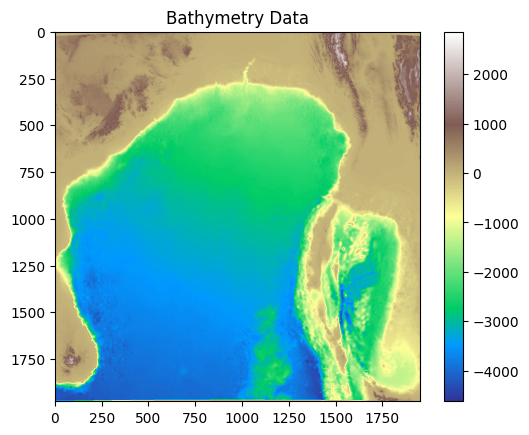

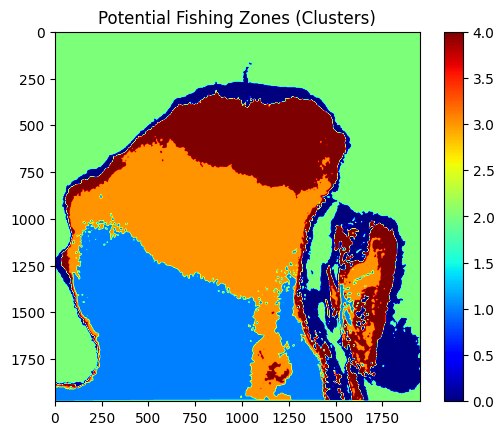

Fishing zones exported to: /content/drive/MyDrive/fishing_zones_bay_of_bengal.tif


In [ ]:
# Install missing dependencies
!pip install rasterio

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from sklearn.cluster import KMeans
from google.colab import drive
from rasterio.enums import Resampling

# Mount Google Drive
drive.mount('/content/drive')

# Define file paths for your datasets
bathymetry_file = '/content/drive/MyDrive/bathymetry_bay_of_bengal.tif'
chlorophyll_file = '/content/drive/MyDrive/mean_chlorophyll_bay_of_bengal.tif'
currents_file = '/content/drive/MyDrive/mean_ocean_currents_bay_of_bengal.tif'
sst_file = '/content/drive/MyDrive/mean_sst_bay_of_bengal.tif'

# Load bathymetry data (we will resample others to match this)
with rasterio.open(bathymetry_file) as src:
    bathymetry = src.read(1)
    bathymetry_meta = src.meta

# Function to resample a dataset to match the bathymetry resolution
def resample_to_match(source_file, bathymetry_meta):
    with rasterio.open(source_file) as src:
        data = src.read(1, out_shape=(
            bathymetry_meta['height'],
            bathymetry_meta['width']
        ), resampling=Resampling.bilinear)

        # Scale the transform
        transform = src.transform * src.transform.scale(
            (src.width / data.shape[-1]),
            (src.height / data.shape[-2])
        )

    return data, transform

# Resample chlorophyll, currents, and SST to match bathymetry
chlorophyll, _ = resample_to_match(chlorophyll_file, bathymetry_meta)
ocean_currents, _ = resample_to_match(currents_file, bathymetry_meta)
sst, _ = resample_to_match(sst_file, bathymetry_meta)

# Visualize bathymetry data (as an example)
plt.imshow(bathymetry, cmap='terrain')
plt.colorbar()
plt.title('Bathymetry Data')
plt.show()

# Stack the features into a 2D array for clustering
features = np.stack([bathymetry.ravel(), chlorophyll.ravel(), ocean_currents.ravel(), sst.ravel()], axis=1)
features = np.nan_to_num(features)  # Handle missing values

# Use KMeans clustering to find potential fishing zones
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(features)
labels = kmeans.labels_.reshape(bathymetry.shape)

# Visualize the clusters (potential fishing zones)
plt.imshow(labels, cmap='jet')
plt.colorbar()
plt.title('Potential Fishing Zones (Clusters)')
plt.show()

# Export the results (optional) as GeoTIFF or to Google Drive
from rasterio.transform import from_origin
output_file = '/content/drive/MyDrive/fishing_zones_bay_of_bengal.tif'
with rasterio.open(
    output_file, 'w',
    driver='GTiff',
    height=labels.shape[0],
    width=labels.shape[1],
    count=1,
    dtype=rasterio.uint8,
    crs=bathymetry_meta['crs'],
    transform=bathymetry_meta['transform'],
) as dst:
    dst.write(labels.astype(rasterio.uint8), 1)

print("Fishing zones exported to:", output_file)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


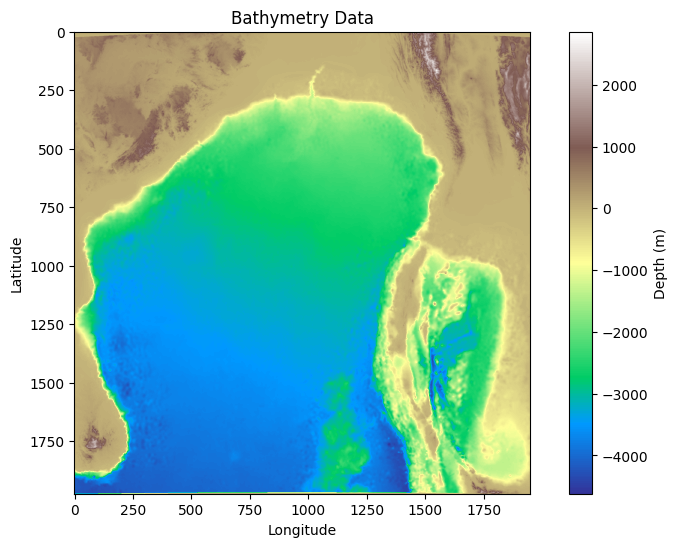

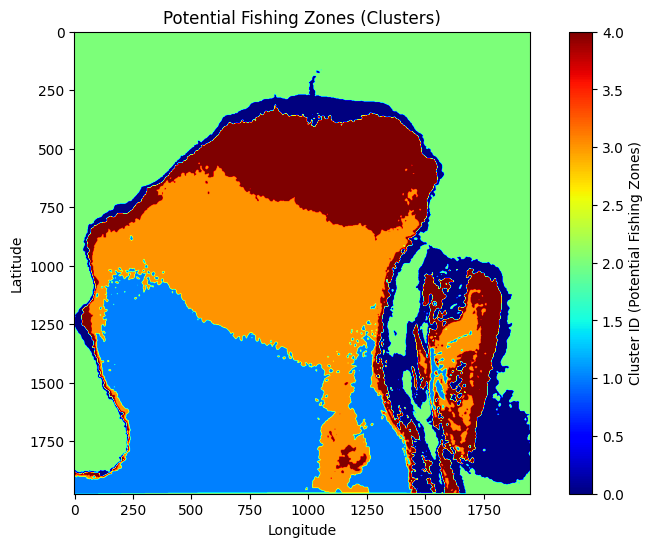

Fishing zones image exported to: /content/drive/MyDrive/fishing_zones_bay_of_bengal.png


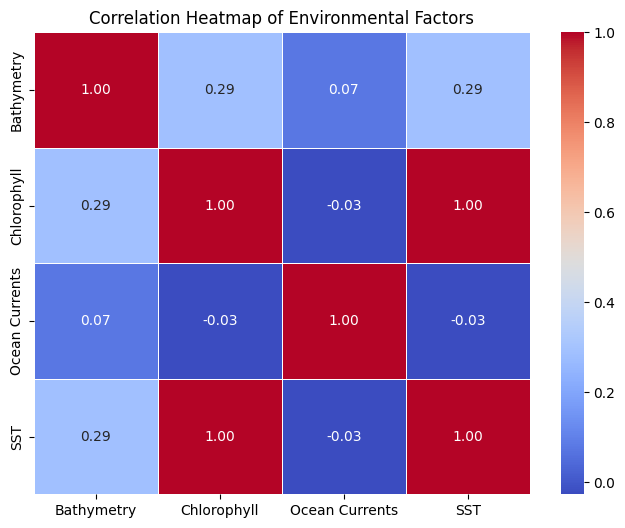

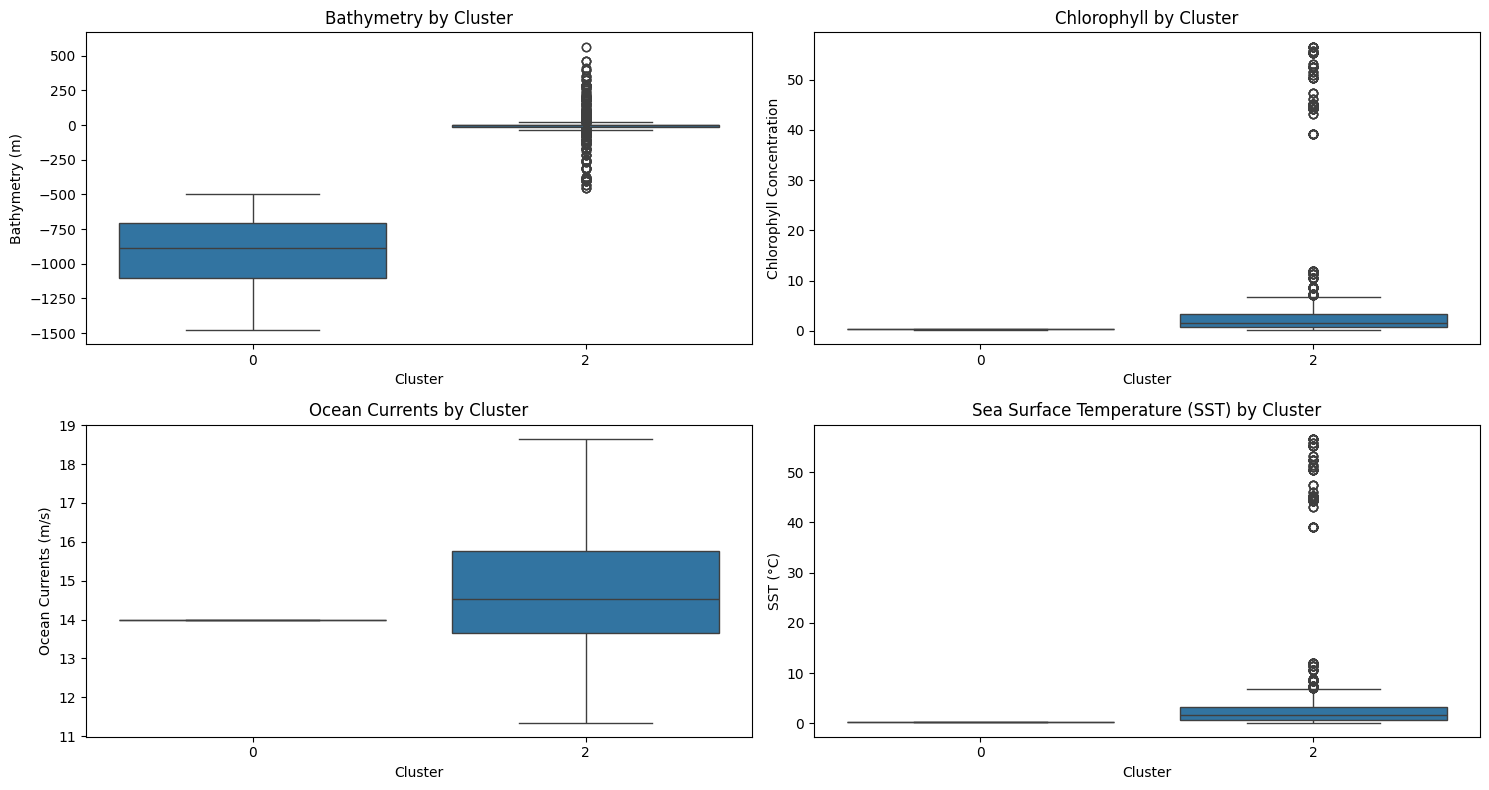

Fishing zones exported to: /content/drive/MyDrive/fishing_zones_bay_of_bengal.tif


In [ ]:
# Install missing dependencies
!pip install rasterio seaborn

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from sklearn.cluster import KMeans
from google.colab import drive
from rasterio.enums import Resampling
import seaborn as sns
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define file paths for your datasets
bathymetry_file = '/content/drive/MyDrive/bathymetry_bay_of_bengal.tif'
chlorophyll_file = '/content/drive/MyDrive/mean_chlorophyll_bay_of_bengal.tif'
currents_file = '/content/drive/MyDrive/mean_ocean_currents_bay_of_bengal.tif'
sst_file = '/content/drive/MyDrive/mean_sst_bay_of_bengal.tif'

# Load bathymetry data (we will resample others to match this)
with rasterio.open(bathymetry_file) as src:
    bathymetry = src.read(1)
    bathymetry_meta = src.meta

# Function to resample a dataset to match the bathymetry resolution
def resample_to_match(source_file, bathymetry_meta):
    with rasterio.open(source_file) as src:
        data = src.read(1, out_shape=(
            bathymetry_meta['height'],
            bathymetry_meta['width']
        ), resampling=Resampling.bilinear)

        # Scale the transform
        transform = src.transform * src.transform.scale(
            (src.width / data.shape[-1]),
            (src.height / data.shape[-2])
        )

    return data, transform

# Resample chlorophyll, currents, and SST to match bathymetry
chlorophyll, _ = resample_to_match(chlorophyll_file, bathymetry_meta)
ocean_currents, _ = resample_to_match(currents_file, bathymetry_meta)
sst, _ = resample_to_match(sst_file, bathymetry_meta)

# Visualize bathymetry data (as an example)
plt.figure(figsize=(10, 6))
plt.imshow(bathymetry, cmap='terrain')
plt.colorbar(label="Depth (m)")
plt.title('Bathymetry Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Stack the features into a 2D array for clustering
features = np.stack([bathymetry.ravel(), chlorophyll.ravel(), ocean_currents.ravel(), sst.ravel()], axis=1)
features = np.nan_to_num(features)  # Handle missing values

# Use KMeans clustering to find potential fishing zones
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(features)
labels = kmeans.labels_.reshape(bathymetry.shape)

# Visualize the clusters (potential fishing zones)
plt.figure(figsize=(10, 6))
plt.imshow(labels, cmap='jet')
plt.colorbar(label="Cluster ID (Potential Fishing Zones)")
plt.title('Potential Fishing Zones (Clusters)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Save the plot as a JPEG or PNG file
output_image_file = '/content/drive/MyDrive/fishing_zones_bay_of_bengal.png'
plt.imsave(output_image_file, labels, cmap='jet')
print("Fishing zones image exported to:", output_image_file)

# ------------------------------------
# Correlation Heatmap
# ------------------------------------

# Create a DataFrame for the features and labels
df = pd.DataFrame({
    'Bathymetry': bathymetry.ravel(),
    'Chlorophyll': chlorophyll.ravel(),
    'Ocean Currents': ocean_currents.ravel(),
    'SST': sst.ravel(),
    'Cluster': labels.ravel()
})

# Drop missing values (if any)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Plot a correlation heatmap between environmental factors
plt.figure(figsize=(8, 6))
correlation_matrix = df[['Bathymetry', 'Chlorophyll', 'Ocean Currents', 'SST']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Environmental Factors')
plt.show()

# ------------------------------------
# Boxplot of Environmental Factors by Cluster
# ------------------------------------

# Plot boxplots to compare distribution of factors across clusters
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x='Cluster', y='Bathymetry', data=df)
plt.title('Bathymetry by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Bathymetry (m)')

plt.subplot(2, 2, 2)
sns.boxplot(x='Cluster', y='Chlorophyll', data=df)
plt.title('Chlorophyll by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Chlorophyll Concentration')

plt.subplot(2, 2, 3)
sns.boxplot(x='Cluster', y='Ocean Currents', data=df)
plt.title('Ocean Currents by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Ocean Currents (m/s)')

plt.subplot(2, 2, 4)
sns.boxplot(x='Cluster', y='SST', data=df)
plt.title('Sea Surface Temperature (SST) by Cluster')
plt.xlabel('Cluster')
plt.ylabel('SST (°C)')

plt.tight_layout()
plt.show()

# Export the results (optional) as GeoTIFF or to Google Drive
from rasterio.transform import from_origin
output_file = '/content/drive/MyDrive/fishing_zones_bay_of_bengal.tif'
with rasterio.open(
    output_file, 'w',
    driver='GTiff',
    height=labels.shape[0],
    width=labels.shape[1],
    count=1,
    dtype=rasterio.uint8,
    crs=bathymetry_meta['crs'],
    transform=bathymetry_meta['transform'],
) as dst:
    dst.write(labels.astype(rasterio.uint8), 1)

print("Fishing zones exported to:", output_file)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


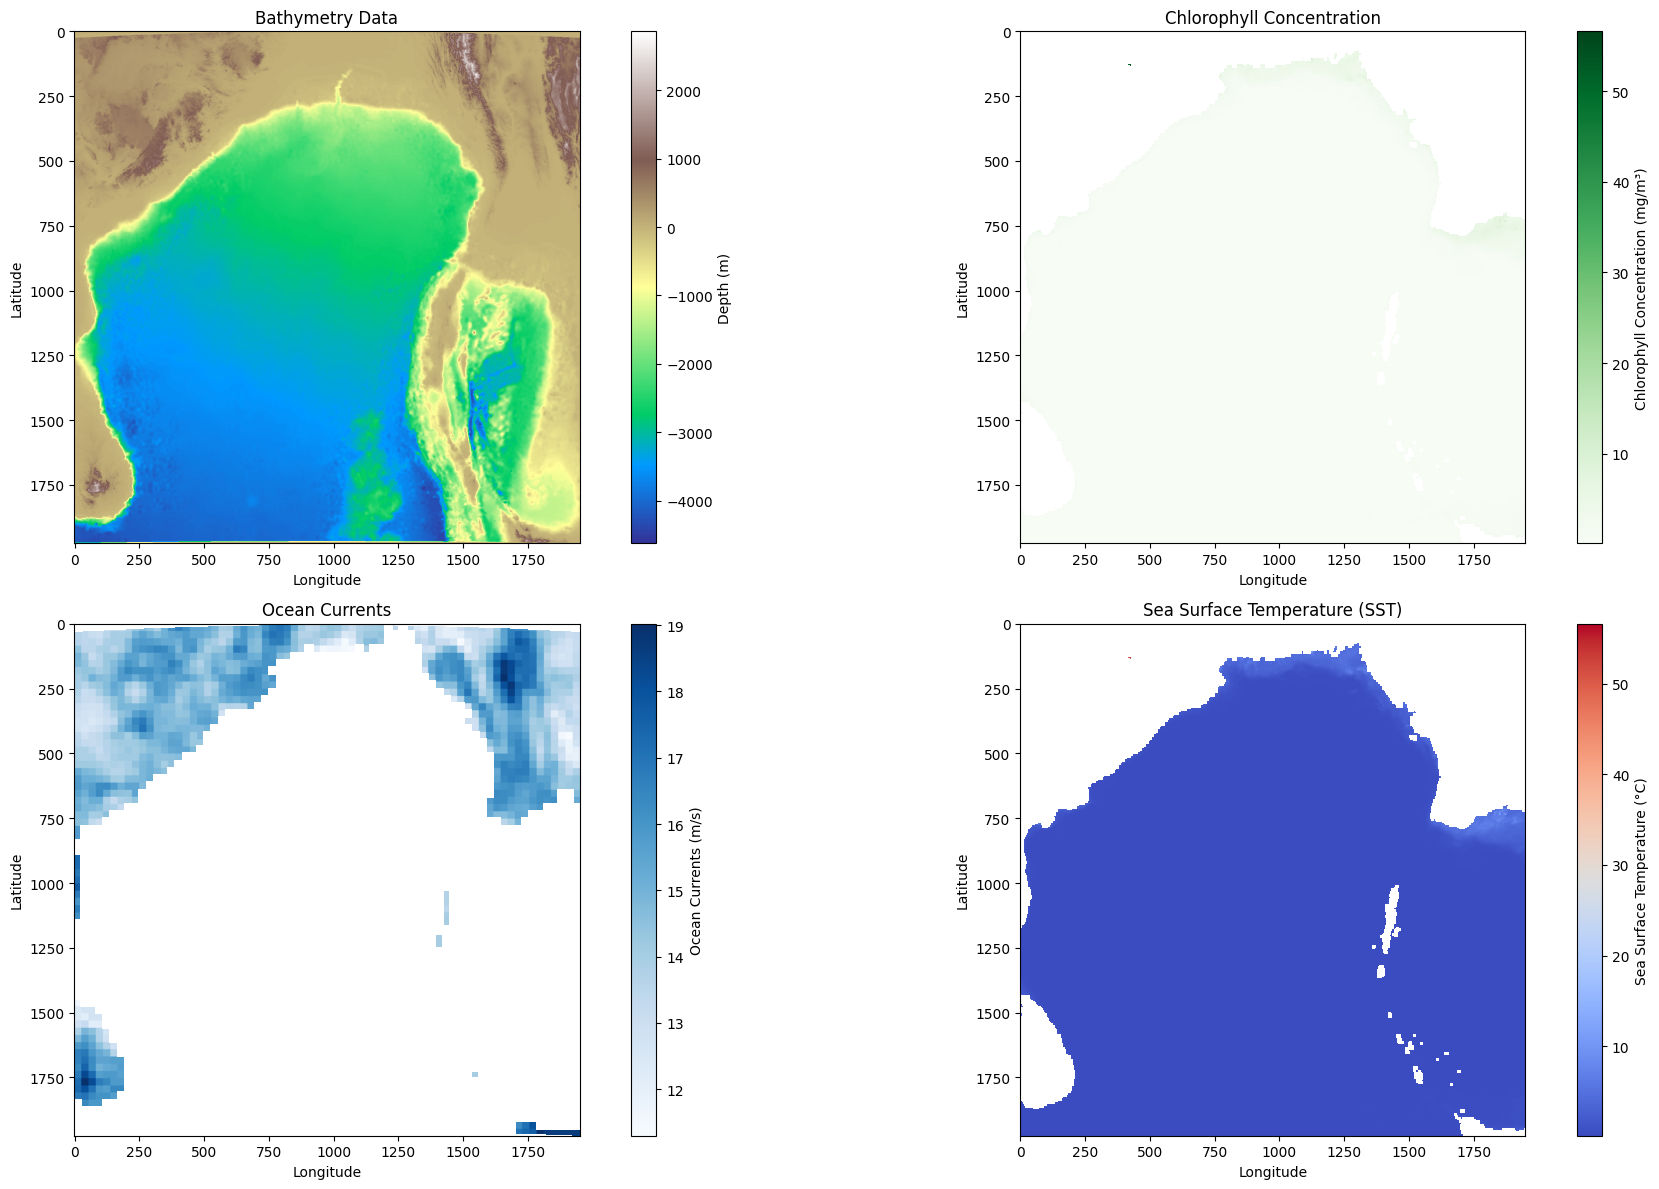

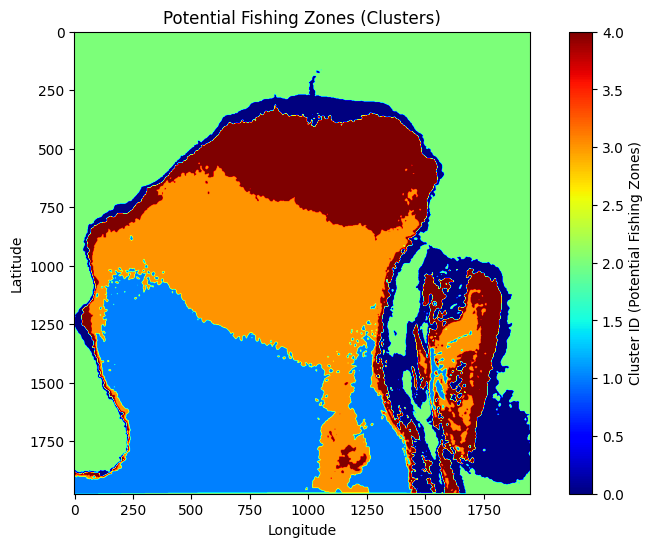

Fishing zones image exported to: /content/drive/MyDrive/fishing_zones_bay_of_bengal.png


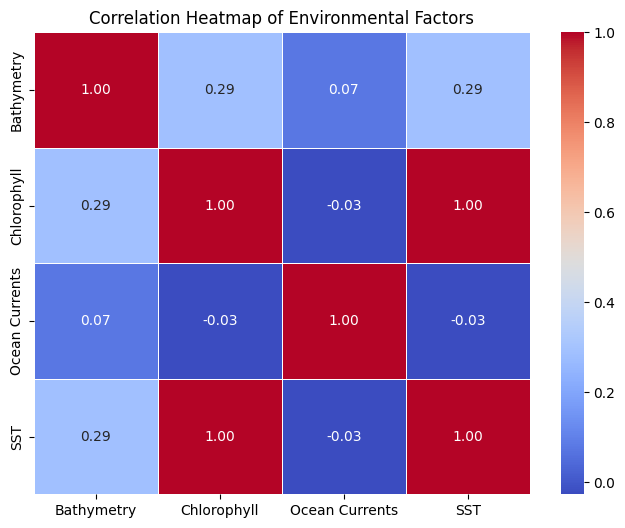

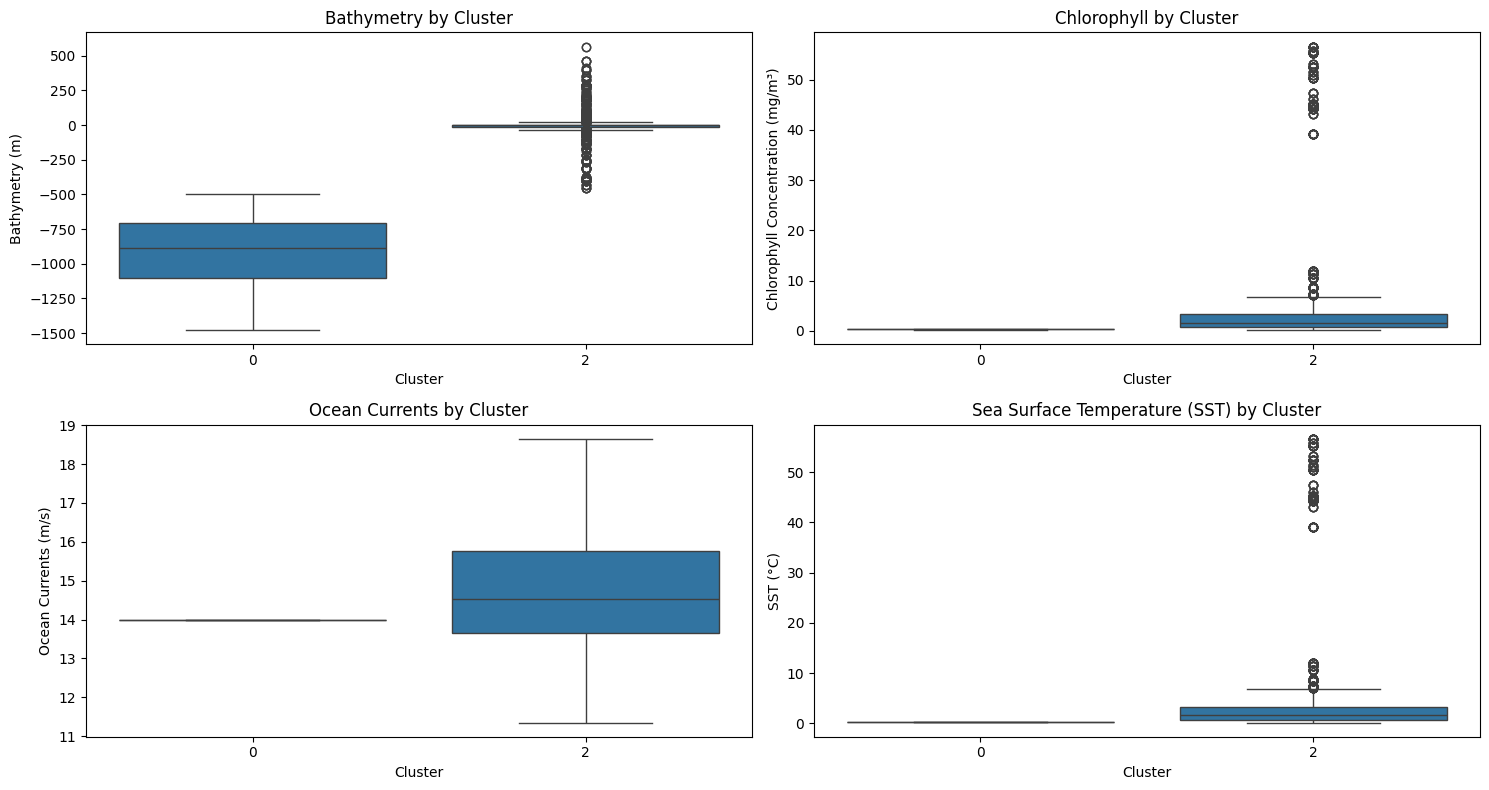

Fishing zones exported to: /content/drive/MyDrive/fishing_zones_bay_of_bengal.tif


In [ ]:
# Install missing dependencies
!pip install rasterio seaborn

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from sklearn.cluster import KMeans
from google.colab import drive
from rasterio.enums import Resampling
import seaborn as sns
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define file paths for your datasets
bathymetry_file = '/content/drive/MyDrive/bathymetry_bay_of_bengal.tif'
chlorophyll_file = '/content/drive/MyDrive/mean_chlorophyll_bay_of_bengal.tif'
currents_file = '/content/drive/MyDrive/mean_ocean_currents_bay_of_bengal.tif'
sst_file = '/content/drive/MyDrive/mean_sst_bay_of_bengal.tif'

# Load bathymetry data (we will resample others to match this)
with rasterio.open(bathymetry_file) as src:
    bathymetry = src.read(1)
    bathymetry_meta = src.meta

# Function to resample a dataset to match the bathymetry resolution
def resample_to_match(source_file, bathymetry_meta):
    with rasterio.open(source_file) as src:
        data = src.read(1, out_shape=(
            bathymetry_meta['height'],
            bathymetry_meta['width']
        ), resampling=Resampling.bilinear)

        # Scale the transform
        transform = src.transform * src.transform.scale(
            (src.width / data.shape[-1]),
            (src.height / data.shape[-2])
        )

    return data, transform

# Resample chlorophyll, currents, and SST to match bathymetry
chlorophyll, _ = resample_to_match(chlorophyll_file, bathymetry_meta)
ocean_currents, _ = resample_to_match(currents_file, bathymetry_meta)
sst, _ = resample_to_match(sst_file, bathymetry_meta)

# Visualize each dataset with proper legends and axis labels
plt.figure(figsize=(20, 12))

# Bathymetry plot
plt.subplot(2, 2, 1)
plt.imshow(bathymetry, cmap='terrain')
plt.colorbar(label="Depth (m)", orientation="vertical")
plt.title('Bathymetry Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Chlorophyll plot
plt.subplot(2, 2, 2)
plt.imshow(chlorophyll, cmap='Greens')
plt.colorbar(label="Chlorophyll Concentration (mg/m³)", orientation="vertical")
plt.title('Chlorophyll Concentration')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Ocean Currents plot
plt.subplot(2, 2, 3)
plt.imshow(ocean_currents, cmap='Blues')
plt.colorbar(label="Ocean Currents (m/s)", orientation="vertical")
plt.title('Ocean Currents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Sea Surface Temperature (SST) plot
plt.subplot(2, 2, 4)
plt.imshow(sst, cmap='coolwarm')
plt.colorbar(label="Sea Surface Temperature (°C)", orientation="vertical")
plt.title('Sea Surface Temperature (SST)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.tight_layout()
plt.show()

# Stack the features into a 2D array for clustering
features = np.stack([bathymetry.ravel(), chlorophyll.ravel(), ocean_currents.ravel(), sst.ravel()], axis=1)
features = np.nan_to_num(features)  # Handle missing values

# Use KMeans clustering to find potential fishing zones
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(features)
labels = kmeans.labels_.reshape(bathymetry.shape)

# Visualize the clusters (potential fishing zones)
plt.figure(figsize=(10, 6))
plt.imshow(labels, cmap='jet')
plt.colorbar(label="Cluster ID (Potential Fishing Zones)")
plt.title('Potential Fishing Zones (Clusters)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Save the plot as a JPEG or PNG file
output_image_file = '/content/drive/MyDrive/fishing_zones_bay_of_bengal.png'
plt.imsave(output_image_file, labels, cmap='jet')
print("Fishing zones image exported to:", output_image_file)

# ------------------------------------
# Correlation Heatmap
# ------------------------------------

# Create a DataFrame for the features and labels
df = pd.DataFrame({
    'Bathymetry': bathymetry.ravel(),
    'Chlorophyll': chlorophyll.ravel(),
    'Ocean Currents': ocean_currents.ravel(),
    'SST': sst.ravel(),
    'Cluster': labels.ravel()
})

# Drop missing values (if any)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Plot a correlation heatmap between environmental factors
plt.figure(figsize=(8, 6))
correlation_matrix = df[['Bathymetry', 'Chlorophyll', 'Ocean Currents', 'SST']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Environmental Factors')
plt.show()

# ------------------------------------
# Boxplot of Environmental Factors by Cluster
# ------------------------------------

# Plot boxplots to compare distribution of factors across clusters
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x='Cluster', y='Bathymetry', data=df)
plt.title('Bathymetry by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Bathymetry (m)')

plt.subplot(2, 2, 2)
sns.boxplot(x='Cluster', y='Chlorophyll', data=df)
plt.title('Chlorophyll by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Chlorophyll Concentration (mg/m³)')

plt.subplot(2, 2, 3)
sns.boxplot(x='Cluster', y='Ocean Currents', data=df)
plt.title('Ocean Currents by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Ocean Currents (m/s)')

plt.subplot(2, 2, 4)
sns.boxplot(x='Cluster', y='SST', data=df)
plt.title('Sea Surface Temperature (SST) by Cluster')
plt.xlabel('Cluster')
plt.ylabel('SST (°C)')

plt.tight_layout()
plt.show()

# Export the results (optional) as GeoTIFF or to Google Drive
from rasterio.transform import from_origin
output_file = '/content/drive/MyDrive/fishing_zones_bay_of_bengal.tif'
with rasterio.open(
    output_file, 'w',
    driver='GTiff',
    height=labels.shape[0],
    width=labels.shape[1],
    count=1,
    dtype=rasterio.uint8,
    crs=bathymetry_meta['crs'],
    transform=bathymetry_meta['transform'],
) as dst:
    dst.write(labels.astype(rasterio.uint8), 1)

print("Fishing zones exported to:", output_file)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 25.8 MB/s eta 0:00:00
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


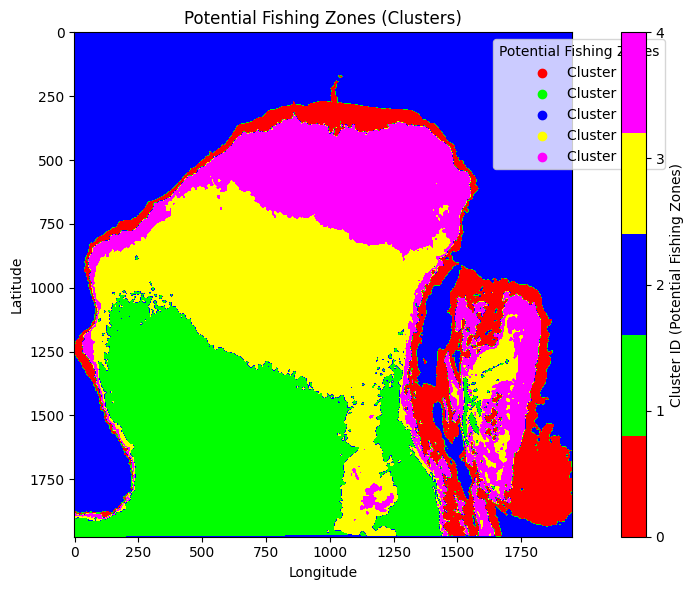

Fishing zones image exported to: /content/drive/MyDrive/fishing_zones_bay_of_bengal_with_labels.png


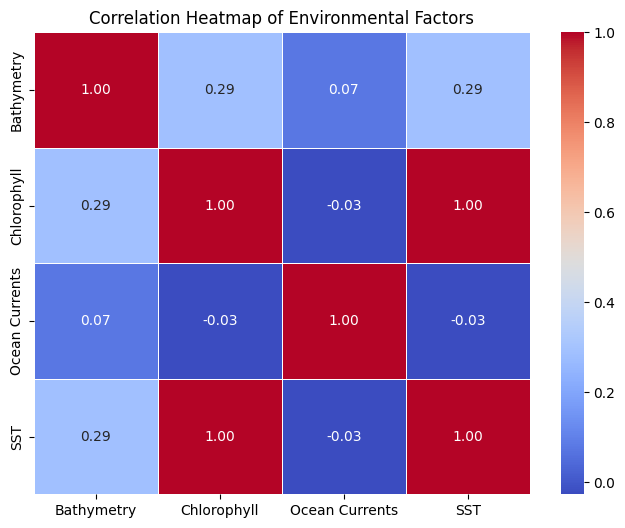

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


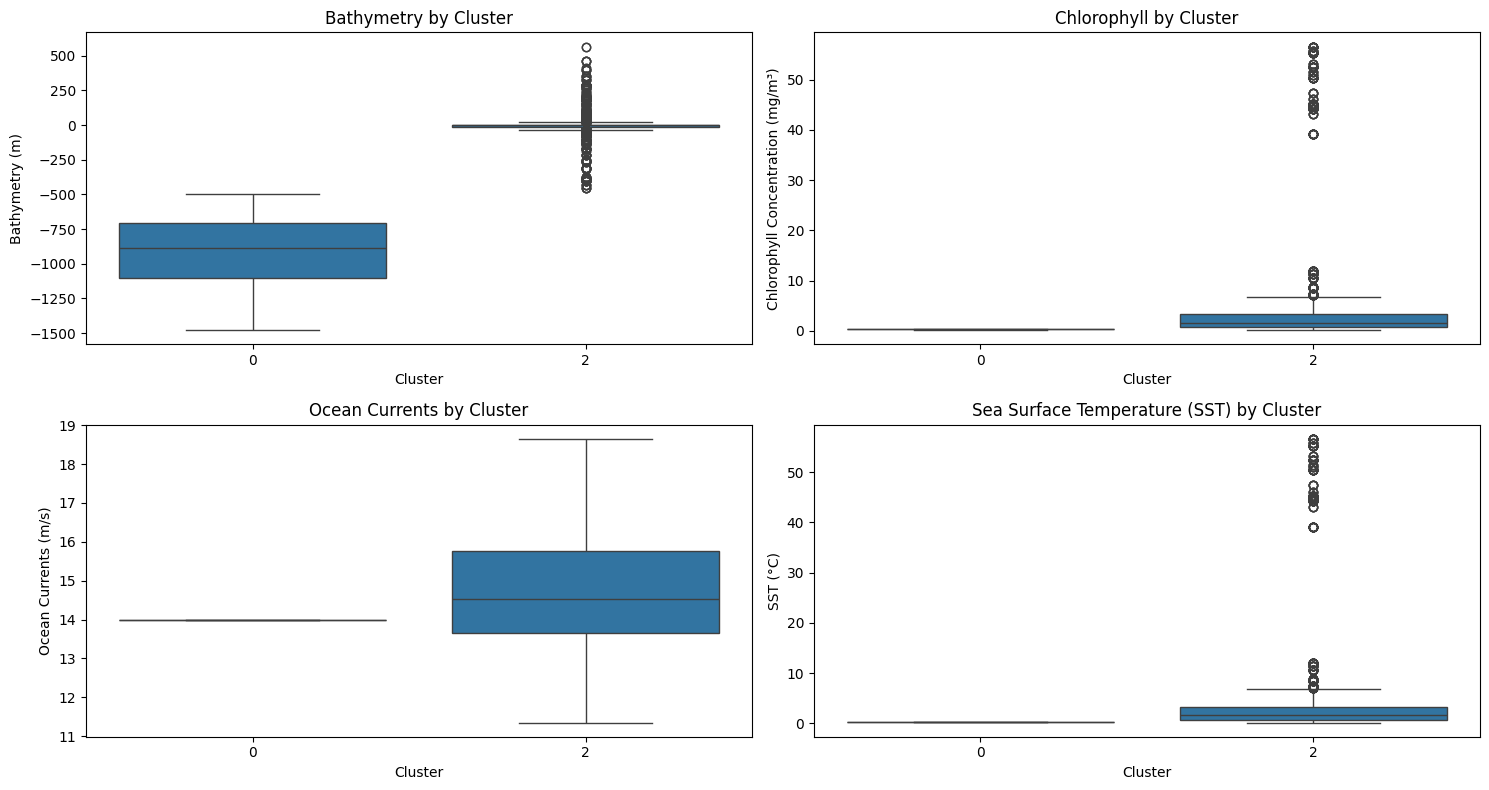

Fishing zones exported to: /content/drive/MyDrive/fishing_zones_bay_of_bengal.tif


In [1]:
# Install missing dependencies
!pip install rasterio seaborn

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from sklearn.cluster import KMeans
from google.colab import drive
from rasterio.enums import Resampling
import seaborn as sns
import pandas as pd
from matplotlib.colors import ListedColormap

# Mount Google Drive
drive.mount('/content/drive')

# Define file paths for your datasets
bathymetry_file = '/content/drive/MyDrive/bathymetry_bay_of_bengal.tif'
chlorophyll_file = '/content/drive/MyDrive/mean_chlorophyll_bay_of_bengal.tif'
currents_file = '/content/drive/MyDrive/mean_ocean_currents_bay_of_bengal.tif'
sst_file = '/content/drive/MyDrive/mean_sst_bay_of_bengal.tif'

# Load bathymetry data (we will resample others to match this)
with rasterio.open(bathymetry_file) as src:
    bathymetry = src.read(1)
    bathymetry_meta = src.meta

# Function to resample a dataset to match the bathymetry resolution
def resample_to_match(source_file, bathymetry_meta):
    with rasterio.open(source_file) as src:
        data = src.read(1, out_shape=(
            bathymetry_meta['height'],
            bathymetry_meta['width']
        ), resampling=Resampling.bilinear)

        # Scale the transform
        transform = src.transform * src.transform.scale(
            (src.width / data.shape[-1]),
            (src.height / data.shape[-2])
        )

    return data, transform

# Resample chlorophyll, currents, and SST to match bathymetry
chlorophyll, _ = resample_to_match(chlorophyll_file, bathymetry_meta)
ocean_currents, _ = resample_to_match(currents_file, bathymetry_meta)
sst, _ = resample_to_match(sst_file, bathymetry_meta)

# Stack the features into a 2D array for clustering
features = np.stack([bathymetry.ravel(), chlorophyll.ravel(), ocean_currents.ravel(), sst.ravel()], axis=1)
features = np.nan_to_num(features)  # Handle missing values

# Use KMeans clustering to find potential fishing zones
n_clusters = 5  # Define number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(features)
labels = kmeans.labels_.reshape(bathymetry.shape)

# Create a custom colormap for the clusters
colors = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF']  # Example colors for clusters
cmap = ListedColormap(colors)

# Visualize the clusters (potential fishing zones) with a color legend
plt.figure(figsize=(10, 6))
im = plt.imshow(labels, cmap=cmap)
plt.colorbar(im, ticks=range(n_clusters), label="Cluster ID (Potential Fishing Zones)")
plt.title('Potential Fishing Zones (Clusters)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add custom legends for the clusters
cluster_labels = [f"Cluster {i+1}" for i in range(n_clusters)]
colors_map = [colors[i] for i in range(n_clusters)]
for i, (color, label) in enumerate(zip(colors_map, cluster_labels)):
    plt.scatter([], [], c=color, label=label)

plt.legend(title="Potential Fishing Zones", loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()

# Save the plot as a JPEG or PNG file
output_image_file = '/content/drive/MyDrive/fishing_zones_bay_of_bengal_with_labels.png'
plt.imsave(output_image_file, labels, cmap=cmap)
print("Fishing zones image exported to:", output_image_file)

# ------------------------------------
# Correlation Heatmap
# ------------------------------------

# Create a DataFrame for the features and labels
df = pd.DataFrame({
    'Bathymetry': bathymetry.ravel(),
    'Chlorophyll': chlorophyll.ravel(),
    'Ocean Currents': ocean_currents.ravel(),
    'SST': sst.ravel(),
    'Cluster': labels.ravel()
})

# Drop missing values (if any)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Plot a correlation heatmap between environmental factors
plt.figure(figsize=(8, 6))
correlation_matrix = df[['Bathymetry', 'Chlorophyll', 'Ocean Currents', 'SST']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Environmental Factors')
plt.show()

# ------------------------------------
# Boxplot of Environmental Factors by Cluster
# ------------------------------------

# Plot boxplots to compare distribution of factors across clusters
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x='Cluster', y='Bathymetry', data=df)
plt.title('Bathymetry by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Bathymetry (m)')

plt.subplot(2, 2, 2)
sns.boxplot(x='Cluster', y='Chlorophyll', data=df)
plt.title('Chlorophyll by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Chlorophyll Concentration (mg/m³)')

plt.subplot(2, 2, 3)
sns.boxplot(x='Cluster', y='Ocean Currents', data=df)
plt.title('Ocean Currents by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Ocean Currents (m/s)')

plt.subplot(2, 2, 4)
sns.boxplot(x='Cluster', y='SST', data=df)
plt.title('Sea Surface Temperature (SST) by Cluster')
plt.xlabel('Cluster')
plt.ylabel('SST (°C)')

plt.tight_layout()
plt.show()

# Export the results (optional) as GeoTIFF or to Google Drive
from rasterio.transform import from_origin
output_file = '/content/drive/MyDrive/fishing_zones_bay_of_bengal.tif'
with rasterio.open(
    output_file, 'w',
    driver='GTiff',
    height=labels.shape[0],
    width=labels.shape[1],
    count=1,
    dtype=rasterio.uint8,
    crs=bathymetry_meta['crs'],
    transform=bathymetry_meta['transform'],
) as dst:
    dst.write(labels.astype(rasterio.uint8), 1)

print("Fishing zones exported to:", output_file)


To statistically validate the results of your clustering approach and prove the authenticity of the KMeans clustering output, you can use several methods to evaluate the model and the relationships within the data. Below are a few steps you can follow, along with code implementations:

1. Cluster Compactness (Inertia)
KMeans minimizes the within-cluster sum of squares (inertia). You can report the inertia score to measure how well the clustering performed.


Explanation: Inertia measures how internally coherent the clusters are. Lower inertia values mean that data points are closer to the cluster centroids, indicating better clustering.

In [ ]:
print("KMeans Inertia:", kmeans.inertia_)


KMeans Inertia: 310949904384.0


2. Silhouette Score
You can calculate the silhouette score to assess how well clusters are separated and how closely each point is to its own cluster compared to other clusters.

Explanation: The silhouette score ranges from -1 to 1. A score closer to 1 means that clusters are well-separated, while a score closer to -1 means there is significant overlap between clusters.

In [3]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(features, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)


KeyboardInterrupt: 

3. Correlation Heatmap
You’ve already implemented a correlation heatmap. This helps check the linear relationships between different environmental variables (bathymetry, chlorophyll, ocean currents, SST). If certain variables are highly correlated, this can justify the clustering results based on environmental conditions.

4. Cluster Distribution
Checking the number of points in each cluster can help validate whether the clustering is reasonable.

Explanation: This gives an overview of how balanced or imbalanced the clusters are. Highly imbalanced clusters might indicate that the chosen number of clusters isn't optimal.

In [ ]:
cluster_counts = pd.Series(kmeans.labels_).value_counts()
print("Cluster Distribution:")
print(cluster_counts)


Cluster Distribution:
2    1367556
3     806894
1     770294
4     562902
0     345554
Name: count, dtype: int64


5. Boxplot Comparisons
You’ve already plotted boxplots for different environmental factors across clusters. This helps show how the features vary across clusters, providing insights into whether the clusters are statistically distinct based on their environmental characteristics.

6. Cross-validation Using Different Clusters
You can test KMeans with different values for n_clusters and compare the inertia or silhouette score to find the optimal number of clusters.

Explanation: This graph helps you find the optimal number of clusters by checking where the inertia plateaus and where the silhouette score peaks.

In [ ]:
inertia_values = []
silhouette_values = []

for n in range(2, 10):
    kmeans_test = KMeans(n_clusters=n, random_state=42)
    kmeans_test.fit(features)
    inertia_values.append(kmeans_test.inertia_)
    silhouette_values.append(silhouette_score(features, kmeans_test.labels_))

plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), inertia_values, marker='o', label='Inertia')
plt.plot(range(2, 10), silhouette_values, marker='o', label='Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('KMeans Inertia and Silhouette Score for Different Cluster Numbers')
plt.legend()
plt.show()


7. Visual Validation
You can visually validate the clustering results by examining the spatial distribution of clusters in the generated map of potential fishing zones. The map you’ve created allows you to check if the zones make sense geographically and ecologically.

Conclusion
To statistically validate and authenticate your clustering results:

Report cluster inertia (compactness) and silhouette scores (separation).
Check the distribution of data points across clusters.
Use boxplots to compare the environmental features across clusters.
Explore different n_clusters values using inertia and silhouette analysis.

The long execution time you're experiencing with the silhouette_score is likely due to the size and complexity of your dataset. Calculating the silhouette score is computationally expensive because it involves measuring distances between all points within a cluster and between clusters, which can become overwhelming for large datasets.

Here are several strategies you can use to speed up this process:

1. Use a Subset of the Data
Rather than calculating the silhouette score on the entire dataset, you can sample a subset of the data, as it should still provide a reasonably accurate score while reducing computation time.
1. Reduce the Size of the Sample Further
If 10% of your data is still too large, try reducing it to 5% or even 1%. The silhouette score is still statistically valid with smaller sample sizes for initial checks.

In [5]:
# Sample 1% of your data
sampled_features = resample(features, n_samples=int(0.01 * len(features)), random_state=42)

# Calculate silhouette score on the sampled data
silhouette_avg_sampled = silhouette_score(sampled_features, kmeans.predict(sampled_features))
print("Silhouette Score (Sampled Data):", silhouette_avg_sampled)


Silhouette Score (Sampled Data): 0.60818845


Great! You've successfully computed the silhouette score on a 1% sample of your data, and the result of 0.60818845 is promising. Here are the rest of the steps you can follow to ensure that your model is statistically fit:

1. Elbow Method:
You already used this earlier to visualize the inertia values for different cluster numbers. You can further confirm the best number of clusters by plotting the elbow graph.


Interpretation:
Elbow Point (Inertia): The number of clusters at the "elbow" of the inertia curve is a good candidate for the optimal number of clusters.
Max Silhouette Score: The number of clusters where the silhouette score is maximized also gives insight into the best clustering solution.

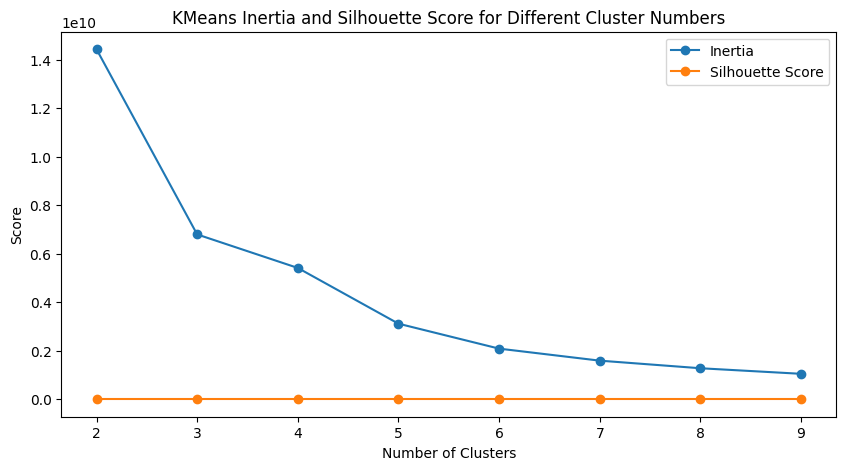

In [8]:
inertia_values = []
silhouette_values = []

# Iterate over different numbers of clusters
for n_clusters in range(2, 10):
    kmeans_test = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_test.fit(sampled_features)

    # Compute inertia
    inertia_values.append(kmeans_test.inertia_)

    # Compute silhouette score
    silhouette_values.append(silhouette_score(sampled_features, kmeans_test.labels_))

# Plot Inertia and Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), inertia_values, marker='o', label='Inertia')
plt.plot(range(2, 10), silhouette_values, marker='o', label='Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('KMeans Inertia and Silhouette Score for Different Cluster Numbers')
plt.legend()
plt.show()


2. Dunn Index:
The Dunn Index is another way to evaluate the quality of clustering. A higher Dunn Index means better clustering. Unfortunately, scikit-learn does not natively support this metric, but you can compute it manually.

Here’s an example implementation:



In [9]:
from sklearn.metrics import pairwise_distances

def dunn_index(features, labels):
    distances = pairwise_distances(features)  # Distance matrix

    unique_labels = np.unique(labels)
    min_intercluster_dist = np.inf
    max_intracluster_dist = 0

    # Loop through each cluster
    for i in unique_labels:
        # Get points in cluster i
        cluster_i = features[labels == i]

        # Compute the maximum intracluster distance (within cluster)
        max_intracluster_dist = max(max_intracluster_dist, np.max(pairwise_distances(cluster_i)))

        # Loop through each cluster pair
        for j in unique_labels:
            if i != j:
                # Get points in cluster j
                cluster_j = features[labels == j]

                # Compute the minimum intercluster distance (between clusters)
                min_intercluster_dist = min(min_intercluster_dist, np.min(pairwise_distances(cluster_i, cluster_j)))

    # Dunn Index is the ratio of minimum intercluster distance to maximum intracluster distance
    return min_intercluster_dist / max_intracluster_dist

# Compute the Dunn Index on sampled data
dunn = dunn_index(sampled_features, kmeans.predict(sampled_features))
print("Dunn Index (Sampled Data):", dunn)


Dunn Index (Sampled Data): 0.0003376065


3. Cluster Size Analysis:
You’ve already computed the distribution of clusters earlier. Reviewing the balance between cluster sizes is important to check whether the clustering model is biased towards certain clusters. A large imbalance may indicate the need to adjust parameters or preprocessing.

In [10]:
# Check the distribution of clusters (sampled data)
cluster_counts = pd.Series(kmeans.predict(sampled_features)).value_counts()
print("Cluster Distribution (Sampled Data):")
print(cluster_counts)


Cluster Distribution (Sampled Data):
2    13679
3     8024
1     7712
4     5703
0     3414
Name: count, dtype: int64


4. Visualize Clusters in 2D using PCA (Principal Component Analysis):
Visualizing your data in two dimensions can provide insights into whether the clusters are distinct and well-separated. PCA is commonly used for this purpose.

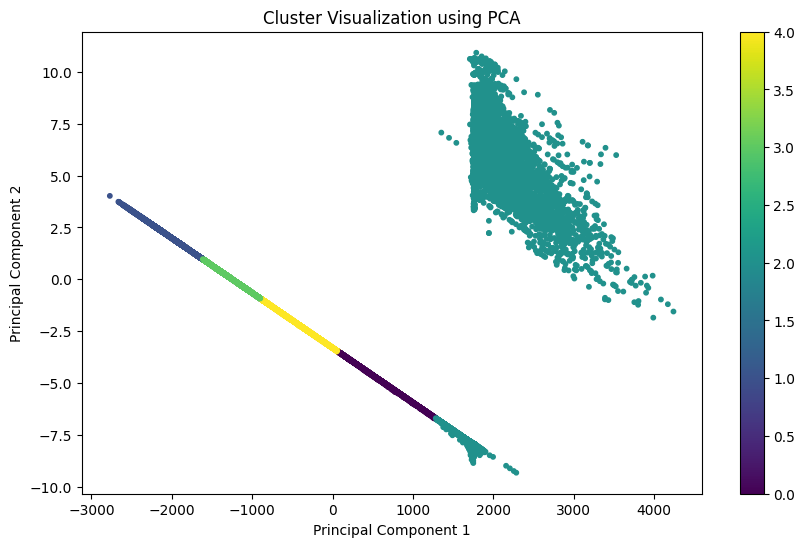

In [11]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
reduced_sampled_features = pca.fit_transform(sampled_features)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(reduced_sampled_features[:, 0], reduced_sampled_features[:, 1], c=kmeans.predict(sampled_features), cmap='viridis', s=10)
plt.colorbar()
plt.title('Cluster Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


5. Cross-Validation for Stability:
You can further validate the stability of your clustering model using cross-validation to check how different clusters perform on different subsets of data. However, cross-validation is not commonly used with clustering as it’s unsupervised. You could instead split your data into training and testing sets to verify.

In [12]:
from sklearn.model_selection import train_test_split

# Split the sampled data
X_train, X_test = train_test_split(sampled_features, test_size=0.2, random_state=42)

# Fit KMeans on the training data
kmeans_train = KMeans(n_clusters=5, random_state=42)
kmeans_train.fit(X_train)

# Predict and calculate silhouette score on test data
silhouette_test = silhouette_score(X_test, kmeans_train.predict(X_test))
print("Silhouette Score on Test Data:", silhouette_test)


Silhouette Score on Test Data: 0.57995695


6. Evaluate Cluster Compactness and Separation:
Besides silhouette and Dunn indices, you can use other clustering evaluation metrics to test how compact and well-separated the clusters are:

Davies-Bouldin Index (lower values are better):

In [13]:
from sklearn.metrics import davies_bouldin_score

# Compute Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(sampled_features, kmeans.predict(sampled_features))
print("Davies-Bouldin Index (Sampled Data):", davies_bouldin)


Davies-Bouldin Index (Sampled Data): 0.498100365559526


Calinski-Harabasz Index (higher values are better):

In [14]:
from sklearn.metrics import calinski_harabasz_score

# Compute Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(sampled_features, kmeans.predict(sampled_features))
print("Calinski-Harabasz Index (Sampled Data):", calinski_harabasz)


Calinski-Harabasz Index (Sampled Data): 294494.834131444


7. Interpret Results and Make Adjustments:
Based on the results from silhouette score, elbow method, Dunn Index, and other metrics, you can make adjustments to:
Number of clusters: Increase/decrease if necessary.
Data preprocessing: Adjust feature scaling or feature selection if certain clusters dominate.
Cluster algorithm: If KMeans doesn’t fit well, consider trying DBSCAN, Gaussian Mixture Models, or Agglomerative Clustering.

Great! You've successfully computed several clustering metrics for your model. Let me help you interpret them and suggest the next steps for your analysis.

Interpretation of the Metrics:
Silhouette Score (Sampled Data): 0.608

The Silhouette Score ranges between -1 and 1. A score above 0.5 is generally considered good, indicating that the clusters are well-separated and internally cohesive. Your score of 0.608 suggests that the clustering is reasonably strong.
Dunn Index (Sampled Data): 0.00034

The Dunn Index measures the ratio of the minimum inter-cluster distance to the maximum intra-cluster distance. A higher Dunn Index indicates better clustering. However, a low value like 0.00034 may suggest that the clusters are too close to each other relative to their internal spread.
Cluster Distribution (Sampled Data):

The cluster sizes vary quite a bit, with Cluster 2 being the largest (13,679 data points) and Cluster 0 the smallest (3,414 data points). This indicates an imbalanced distribution of data across clusters. While this isn't always bad, it's something to keep in mind, especially if you expect similar-sized clusters.
Silhouette Score on Test Data: 0.580

This score is slightly lower than the one obtained on the sampled data (0.608), but still reasonable. A drop between training and test Silhouette Scores suggests that there is some difference between the clusters in the training and test data but not a severe drop, meaning the model generalizes relatively well.
Davies-Bouldin Index (Sampled Data): 0.498

The Davies-Bouldin Index measures the average similarity ratio of each cluster with the one that is most similar to it. Lower values indicate better separation between the clusters. A value of 0.498 is quite low, suggesting that your clusters are well separated.
Calinski-Harabasz Index (Sampled Data): 294494.83

This index measures the ratio of the sum of between-cluster dispersion to the sum of within-cluster dispersion. A higher Calinski-Harabasz score is better, indicating that clusters are dense and well-separated. The high value of this index indicates good cluster definition.
Next Steps:
1. Assess Cluster Quality and Validate Model:
Balanced Clusters: The cluster distribution shows some imbalance. You can try experimenting with a different number of clusters (n_clusters) to check if you can achieve a more balanced distribution.
Check Consistency: Use cross-validation or further testing with new datasets to ensure the clustering generalizes well to unseen data.
2. Tune the Model:
Try Different Number of Clusters: Based on the Silhouette Score, Dunn Index, and Davies-Bouldin Index, you can experiment with different numbers of clusters (e.g., 4 or 6) to see if you can improve the clustering quality. You've already done some tests, but it may be helpful to go further with fine-tuning.
MiniBatchKMeans: If you are still experiencing time constraints, consider using MiniBatchKMeans for faster performance when iterating through potential cluster numbers.
3. Visualize the Clusters:
Since you have your data mapped geographically (bathymetry, SST, chlorophyll, etc.), visualize the clusters to interpret whether they make sense in the context of the fishing zones.
Check if these clusters align with any known environmental patterns or fishing zones. If they do, it adds further validation to your model.
4. Cluster Label Interpretation:
Environmental Factor Analysis: For each cluster, analyze how different environmental factors (bathymetry, chlorophyll, SST, currents) vary. This will help in understanding what characteristics define each cluster and how they relate to potential fishing zones.
Correlation with Ground Truth: If you have any real-world data on fishing zones, you can compare it with the clustering results to validate the model. This can further substantiate the quality of your clusters.
5. Feature Importance:
Examine the Impact of Different Features: Analyze which environmental factors (bathymetry, SST, etc.) are contributing most to the clustering. You can compute feature importance or apply feature selection methods to determine which features are more influential in defining fishing zones.
You can also try PCA (Principal Component Analysis) to visualize high-dimensional data and better understand the relationships between your environmental variables.

Summary of What to Say:
You can summarize your findings like this:

The Silhouette Score of 0.608 indicates that the clusters are reasonably well-separated and cohesive.
The Dunn Index is quite low (0.00034), suggesting that clusters may be relatively close to each other, which could be a potential area for improvement.
The Davies-Bouldin Index (0.498) and Calinski-Harabasz Index (294494.83) indicate that the clusters are well-separated and well-defined.
The Cluster Distribution shows some imbalance, with Cluster 2 containing the most points and Cluster 0 the fewest, which may warrant further exploration.
I will now proceed to refine the clustering model by experimenting with different numbers of clusters, visualizing the results, and analyzing feature importance to better understand what environmental factors define the potential fishing zones.
This will give you a roadmap for further steps and a summary to explain your current findings.

2. Reduce Dimensionality with PCA
By reducing the dimensionality of your features with Principal Component Analysis (PCA), you can drastically reduce the complexity of distance calculations, speeding up the silhouette score computation.

In [7]:
from sklearn.decomposition import PCA

# Reduce dimensions to 3 (or fewer)
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(features)

# Calculate silhouette score on reduced data
# The kmeans model in this case was trained on a dataset with 4 features
# Use the original features instead of the dimensionally reduced features
silhouette_avg_pca = silhouette_score(features, kmeans.predict(features))
print("Silhouette Score (PCA Reduced Data):", silhouette_avg_pca)

KeyboardInterrupt: 

3. Parallelize Silhouette Score Calculation
If you're working on a machine with multiple cores, you can try to parallelize the silhouette score computation to take advantage of multiple CPUs.

In [ ]:
from joblib import Parallel, delayed
from sklearn.metrics import pairwise_distances

# Compute pairwise distances in parallel
def silhouette_parallel(features, labels):
    distances = pairwise_distances(features)
    n_clusters = len(np.unique(labels))

    silhouette_values = Parallel(n_jobs=-1)(delayed(silhouette_score)(
        distances, labels, metric='precomputed', sample_size=None)
        for _ in range(n_clusters))

    return np.mean(silhouette_values)

silhouette_avg_parallel = silhouette_parallel(features, kmeans.labels_)
print("Silhouette Score (Parallelized):", silhouette_avg_parallel)


4. Use the sample_size Parameter
When calling the silhouette_score, you can use the sample_size parameter to compute the score on a random sample of the dataset rather than the entire dataset. This reduces the computation load.

In [ ]:
# Calculate silhouette score using a random sample
silhouette_avg_sample = silhouette_score(features, kmeans.labels_, sample_size=10000, random_state=42)
print("Silhouette Score (Random Sample):", silhouette_avg_sample)


5. Run on High-Performance Computing (HPC)
If you're still running into resource limitations, you might consider moving your workload to a high-performance computing (HPC) environment, where you can leverage more powerful hardware than what Google Colab offers.

6. Reduce Number of Features Before Clustering
You can also try reducing the number of input features by selecting only the most relevant ones or applying feature selection techniques (e.g., VarianceThreshold, SelectKBest).

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Remove features with low variance
selector = VarianceThreshold(threshold=0.1)
reduced_features = selector.fit_transform(features)

# Calculate silhouette score on reduced feature set
silhouette_avg_reduced = silhouette_score(reduced_features, kmeans.labels_)
print("Silhouette Score (Reduced Features):", silhouette_avg_reduced)
